/Users/cjg66/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


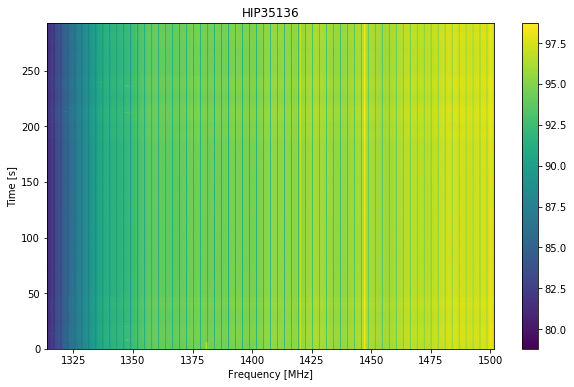

In [1]:
#Filterbank and plot_waterfall work

#working directly from breakthrough/GBT/filterbank_tutorial/Filterbank Tutorial (public).ipynb
#Using Python 2 and the Filterbank.py method of importing filterbank files
#https://github.com/UCBerkeleySETI/breakthrough/blob/master/GBT/filterbank_tutorial/Filterbank%20Tutorial%20(public).ipynb

from blimpy2 import Filterbank
import matplotlib.pyplot as plt
%matplotlib inline

fil1='voyager_f1032192_t300_v2.fil' #from voyager tutorial
fil2='blc3_2bit_guppi_57386_VOYAGER1_0002.gpuspec.0002.fil' #smallest voyager.fil from http://setiathome.berkeley.edu/~mattl/ml/
fil3='blc04_guppi_57563_69862_HIP35136_0011.gpuspec.0002.fil' #from filterbank tutorial

fil = Filterbank(fil3)

plt.figure(figsize=(10,6))
fil.plot_waterfall()
#fig = plt.gcf()
#fig.savefig("justwork.png", bbox_inches="tight")

In [2]:
fil.info()

    telescope_id :                                6
     rawdatafile : guppi_57563_69862_HIP35136_0011.0000.raw
     source_name :                         HIP35136
   tstart (ISOT) :          2016-06-24T19:24:22.000
    tstart (MJD) :                     57563.808588
       data_type :                                1
          nchans :                            65536
           ibeam :                                1
           tsamp :               1.0737418239999998
            foff :             -0.00286102294921875
         src_raj :                      7:15:50.064
         src_dej :                      47:14:20.04
          nbeams :                                1
        az_start :                              0.0
            fch1 :               1501.4634132385254
        za_start :                              0.0
      machine_id :                               20
            nifs :                                1
           nbits :                               32

Num

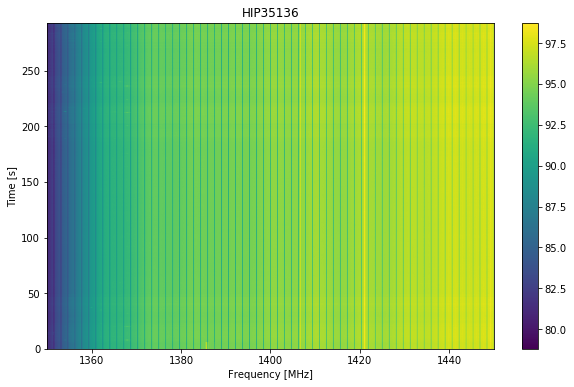

In [3]:
#Doesn't actually zoom in, just changes the axes labels?

plt.figure(figsize=(10,6))
fil.plot_waterfall(f_start=1350, f_stop=1450)
#fig = plt.gcf()
#fig.savefig("justwork2.png", bbox_inches="tight")

extracting integration 0...


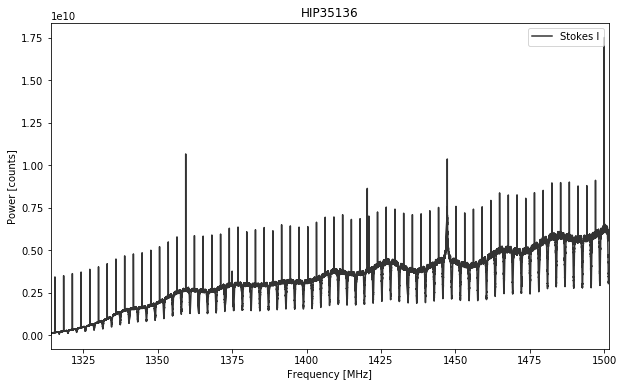

In [4]:
#plot_spectrum works

plt.figure(figsize=(10,6))
fil.plot_spectrum() #Leaving arguments blank will cause it to show integration 0 by default

extracting integration 99...


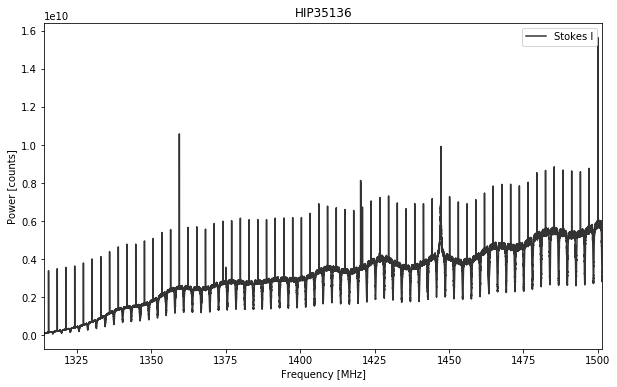

In [5]:
#plot_spectrum works

plt.figure(figsize=(10,6))
fil.plot_spectrum(t=99) #Leaving arguments blank will cause it to show integration 0 by default

extracting integration 0...


ValueError: x and y must have same first dimension, but have shapes (1049,) and (65536,)

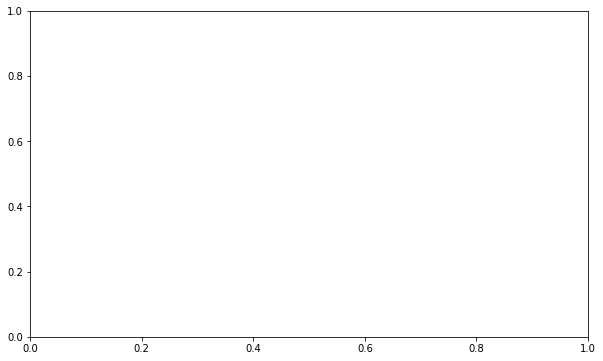

In [6]:
#plot_spectrum can't zoom (breaks in Filterbank case)

plt.figure(figsize=(10,6))
fil.plot_spectrum(f_start=1419, f_stop=1422)

In [7]:
#fil variable gets modified by broken plot_spectrum function and has to be reloaded in next cell

fil.info()

    telescope_id :                                6
     rawdatafile : guppi_57563_69862_HIP35136_0011.0000.raw
     source_name :                         HIP35136
   tstart (ISOT) :          2016-06-24T19:24:22.000
    tstart (MJD) :                     57563.808588
       data_type :                                1
          nchans :                            65536
           ibeam :                                1
           tsamp :               1.0737418239999998
            foff :             -0.00286102294921875
         src_raj :                      7:15:50.064
         src_dej :                      47:14:20.04
          nbeams :                                1
        az_start :                              0.0
            fch1 :               1501.4634132385254
        za_start :                              0.0
      machine_id :                               20
            nifs :                                1
           nbits :                               32

Num

extracting integration 99...


ValueError: x and y must have same first dimension, but have shapes (1049,) and (65536,)

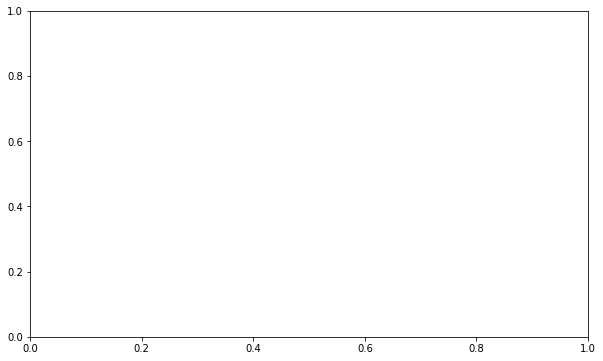

In [8]:
#plot_spectrum can't zoom (breaks in Filterbank case)

fil = Filterbank(fil3)
plt.figure(figsize=(10,6))
fil.plot_spectrum(t=99, f_start=1419, f_stop=1422)

In [9]:
#fil variable gets modified by broken plot_spectrum function and has to be reloaded in next cell

fil.info()

    telescope_id :                                6
     rawdatafile : guppi_57563_69862_HIP35136_0011.0000.raw
     source_name :                         HIP35136
   tstart (ISOT) :          2016-06-24T19:24:22.000
    tstart (MJD) :                     57563.808588
       data_type :                                1
          nchans :                            65536
           ibeam :                                1
           tsamp :               1.0737418239999998
            foff :             -0.00286102294921875
         src_raj :                      7:15:50.064
         src_dej :                      47:14:20.04
          nbeams :                                1
        az_start :                              0.0
            fch1 :               1501.4634132385254
        za_start :                              0.0
      machine_id :                               20
            nifs :                                1
           nbits :                               32

Num

In [10]:
fil = Filterbank(fil3)
freqs = fil.freqs
print freqs
print type(freqs)
print len(freqs)

[1501.46341324 1501.46055222 1501.45769119 ... 1313.97199631 1313.96913528
 1313.96627426]
<type 'numpy.ndarray'>
65536


In [11]:
data = fil.data
print data.shape
print type(data)

(273, 1, 65536)
<type 'numpy.ndarray'>


In [12]:
powers100 = data[99]
print powers100
powers100 = powers100[0]
print powers100
print len(powers100)

[[2.8857830e+09 2.8859174e+09 2.8348301e+09 ... 7.9145184e+07
  7.7173816e+07 7.9324048e+07]]
[2.8857830e+09 2.8859174e+09 2.8348301e+09 ... 7.9145184e+07 7.7173816e+07
 7.9324048e+07]
65536


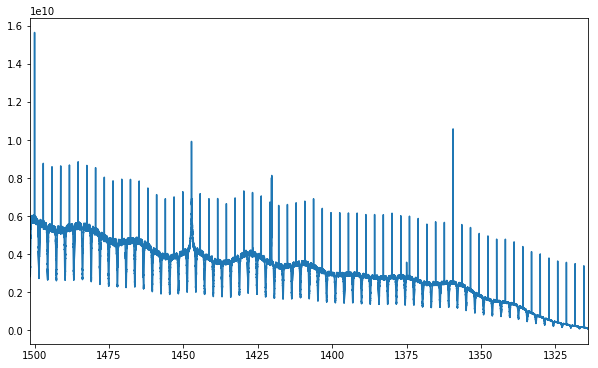

In [13]:
#the data is extracted in an orientation opposite to that shown in plot_spectrum

plt.figure(figsize=(10,6))
plt.plot(freqs, powers100)
plt.xlim(freqs[0], freqs[-1])
plt.show()

In [14]:
header = fil.header
print header

{'telescope_id': 6, 'rawdatafile': 'guppi_57563_69862_HIP35136_0011.0000.raw', 'source_name': 'HIP35136', 'tstart': 57563.808587962965, 'data_type': 1, 'nchans': 65536, 'ibeam': 1, 'tsamp': 1.0737418239999998, 'foff': -0.00286102294921875, 'src_raj': <Angle 7.26390667 hourangle>, 'src_dej': <Angle 47.2389 deg>, 'nbeams': 1, 'az_start': 0.0, 'fch1': 1501.4634132385254, 'za_start': 0.0, 'machine_id': 20, 'nifs': 1, 'nbits': 32}


In [15]:
nchans = header['nchans']
print nchans

65536


In [16]:
from blimpy2 import read_header

header2 = read_header('blc04_guppi_57563_69862_HIP35136_0011.gpuspec.0002.fil')
print header2

{'telescope_id': 6, 'rawdatafile': 'guppi_57563_69862_HIP35136_0011.0000.raw', 'source_name': 'HIP35136', 'tstart': 57563.808587962965, 'data_type': 1, 'nchans': 65536, 'ibeam': 1, 'tsamp': 1.0737418239999998, 'foff': -0.00286102294921875, 'src_raj': <Angle 7.26390667 hourangle>, 'src_dej': <Angle 47.2389 deg>, 'nbeams': 1, 'az_start': 0.0, 'fch1': 1501.4634132385254, 'za_start': 0.0, 'machine_id': 20, 'nifs': 1, 'nbits': 32}
